In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2

%matplotlib inline
from matplotlib import pyplot as plt 
import pylab 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) 

In [ ]:
export_dir='/content/drive/MyDrive/1_LiveProjects/Project5_AgeGenderEmotion_Detection/1.1_age_input_output/output/age_model_acc_0.736.h5'
age_model = load_model(export_dir)

age_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      320       
                                                                 
 average_pooling2d_4 (Avera  (None, 99, 99, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 average_pooling2d_5 (Avera  (None, 48, 48, 64)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 average_pooling2d_6 (Avera  (None, 23, 23, 128)      

In [ ]:
export_dir='/content/drive/MyDrive/1_LiveProjects/gender_model.h5'
gender_model = load_model(export_dir)
gender_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                             

In [ ]:
export_dir='/content/drive/MyDrive/1_LiveProjects/Project5_AgeGenderEmotion_Detection/1.3_emotion_input_output/output/emotion_model_pretrained.h5'
emotion_model = load_model(export_dir)
emotion_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

In [ ]:
age_ranges = ['1-2', '3-9', '10-20', '21-27', '28-45', '46-65', '66-116']
gender_ranges = ['male', 'female']
emotion_ranges= ['positive','negative','neutral']

In [ ]:
img_path = "/content/drive/MyDrive/baby.jpg"

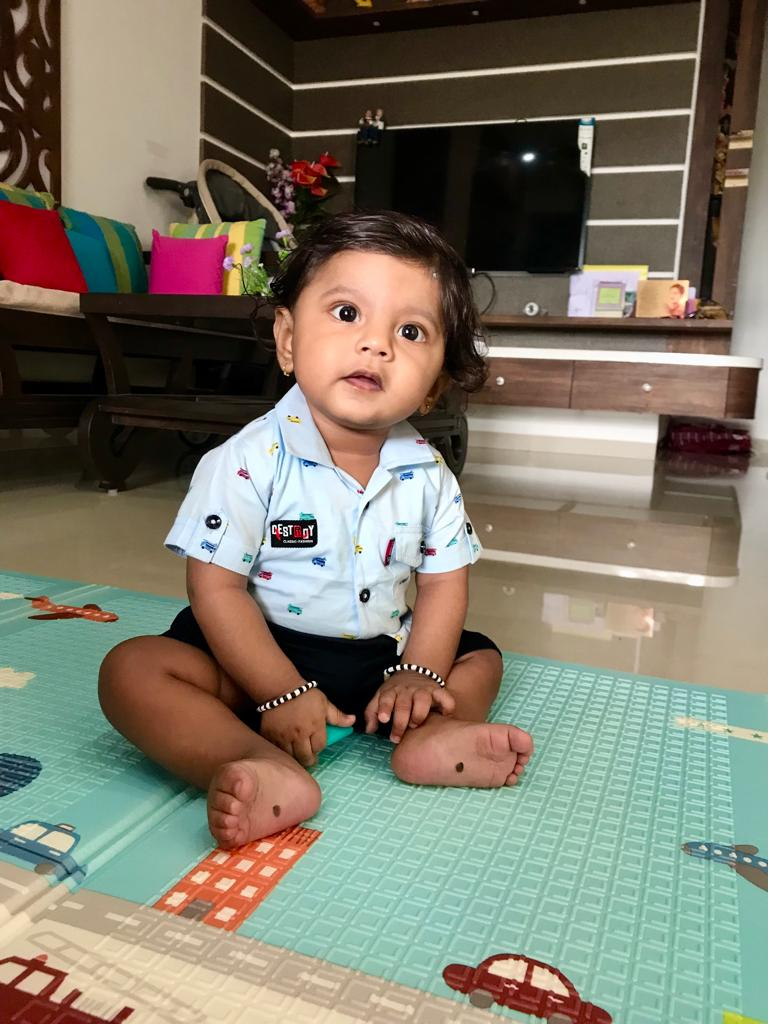

In [ ]:
from IPython.display import Image
pil_img = Image(filename=img_path)
display(pil_img)

1/1 [==============================] - 0s 125ms/step
1: male, 1-2, neutral


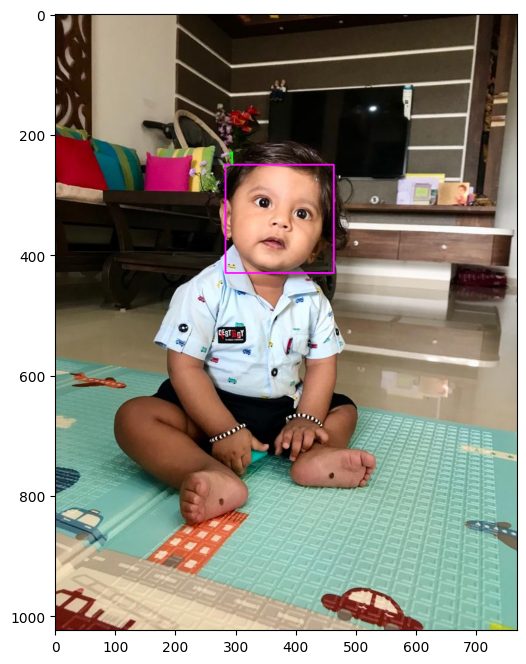

In [ ]:
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/1_LiveProjects/Copy of haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(400,12,400),2)

  img_gray=gray[y:y+h,x:x+w]

  emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]

  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

  age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
  age_input = age_image.reshape(-1, 200, 200, 1)
  output_age = age_ranges[np.argmax(age_model.predict(age_input))]


  output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  print(output_str)

  col = (0,255,0)

  cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [ ]:

img_path1 = "/content/drive/MyDrive/IMG-20240122-WA0023.jpg"

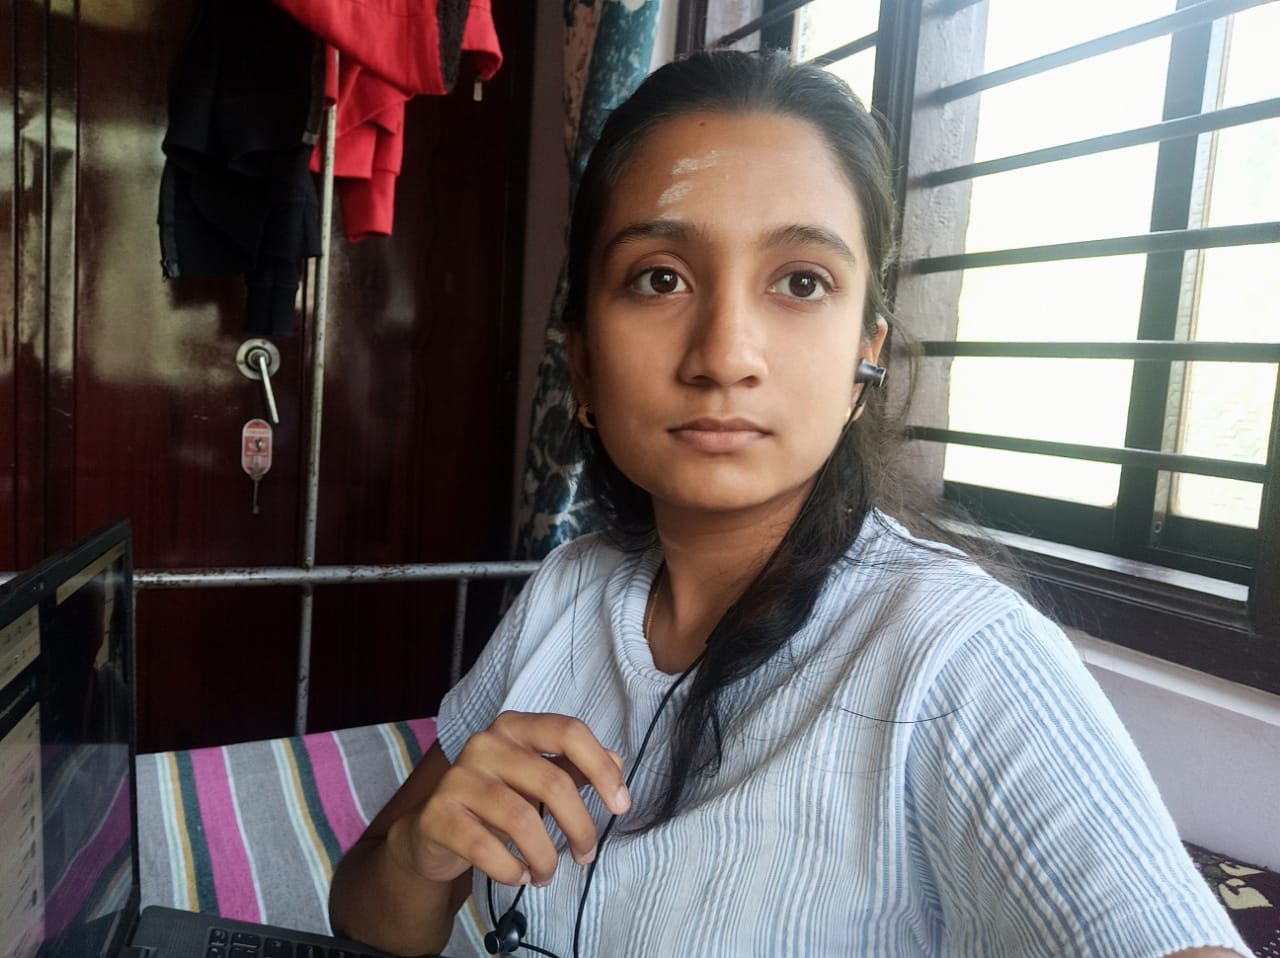

In [ ]:
from IPython.display import Image
pil_img = Image(filename=img_path1)
display(pil_img)

1/1 [==============================] - 0s 39ms/step
1: female, 10-20, neutral


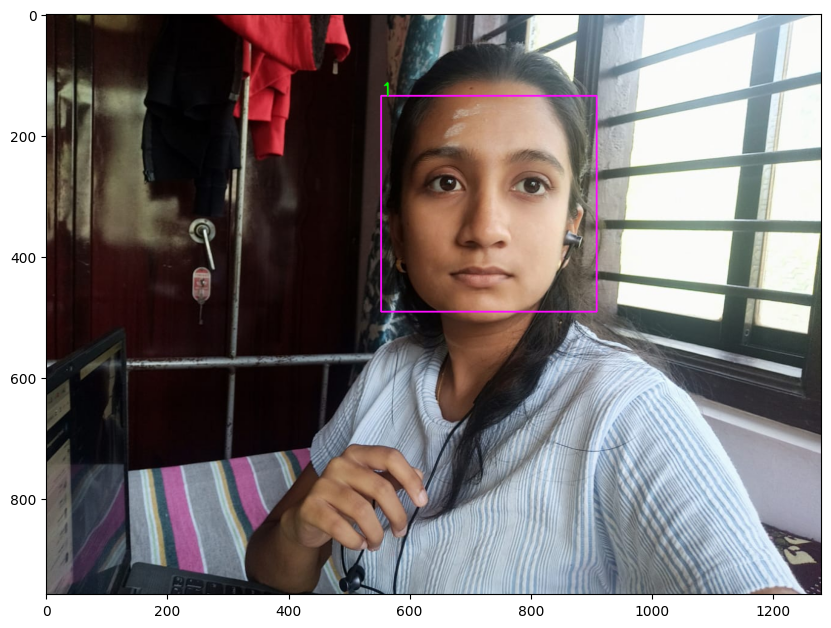

In [ ]:
test_image = cv2.imread(img_path1)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/1_LiveProjects/Copy of haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(400,12,400),2)

  img_gray=gray[y:y+h,x:x+w]

  emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]

  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

  age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
  age_input = age_image.reshape(-1, 200, 200, 1)
  output_age = age_ranges[np.argmax(age_model.predict(age_input))]


  output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  print(output_str)

  col = (0,255,0)

  cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [ ]:
img_path2 = "/content/drive/MyDrive/giri.jpg"

1/1 [==============================] - 0s 44ms/step
1: male, 21-27, positive


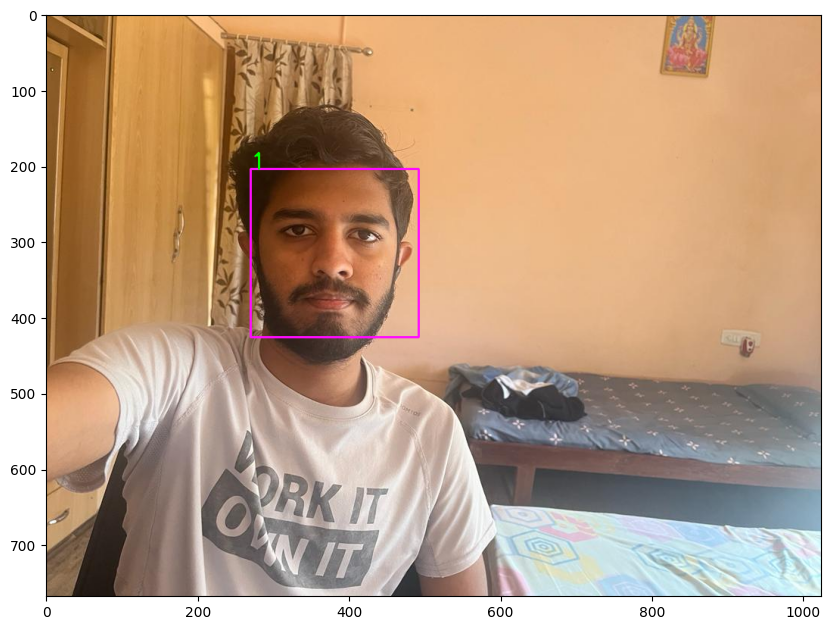

In [ ]:
test_image = cv2.imread(img_path2)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/1_LiveProjects/Copy of haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(400,12,400),2)

  img_gray=gray[y:y+h,x:x+w]

  emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]

  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

  age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
  age_input = age_image.reshape(-1, 200, 200, 1)
  output_age = age_ranges[np.argmax(age_model.predict(age_input))]


  output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  print(output_str)

  col = (0,255,0)

  cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [ ]:
img_path3 = "/content/drive/MyDrive/360_F_33378356_gbnqycEE7TWnxa8Og49mkTn6ISTjxjVT.jpg"

1/1 [==============================] - 0s 180ms/step
1: male, 46-65, negative


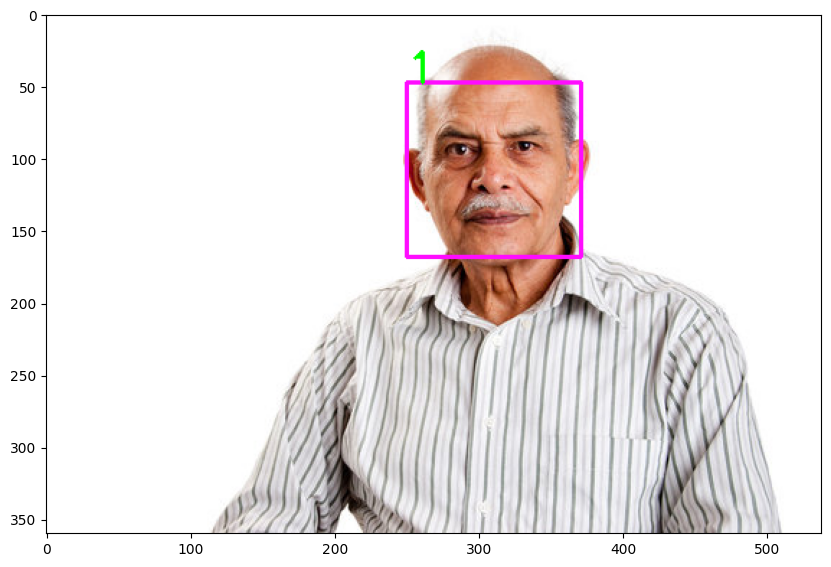

In [ ]:
test_image = cv2.imread(img_path3)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/1_LiveProjects/Copy of haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(400,12,400),2)

  img_gray=gray[y:y+h,x:x+w]

  emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]

  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

  age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
  age_input = age_image.reshape(-1, 200, 200, 1)
  output_age = age_ranges[np.argmax(age_model.predict(age_input))]


  output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  print(output_str)

  col = (0,255,0)

  cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [ ]:
img_path4 = "/content/drive/MyDrive/WhatsApp Image 2024-02-16 at 18.55.29_59c0b69c.jpg"

1/1 [==============================] - 0s 78ms/step
1: female, 10-20, positive


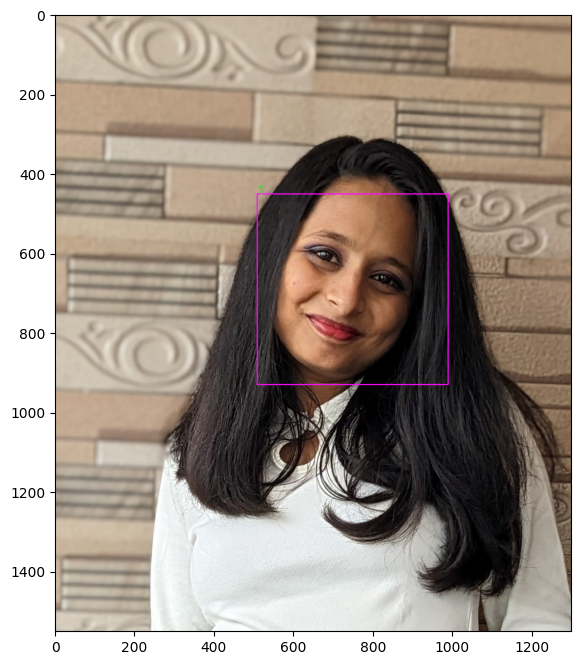

In [ ]:
test_image = cv2.imread(img_path4)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/1_LiveProjects/Copy of haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(400,12,400),2)

  img_gray=gray[y:y+h,x:x+w]

  emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]

  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

  age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
  age_input = age_image.reshape(-1, 200, 200, 1)
  output_age = age_ranges[np.argmax(age_model.predict(age_input))]


  output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  print(output_str)

  col = (0,255,0)

  cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [ ]:
img_path5 = "/content/drive/MyDrive/WhatsApp Image 2024-02-17 at 16.00.30_63d0c994.jpg"

1/1 [==============================] - 0s 41ms/step
1: male, 28-45, positive


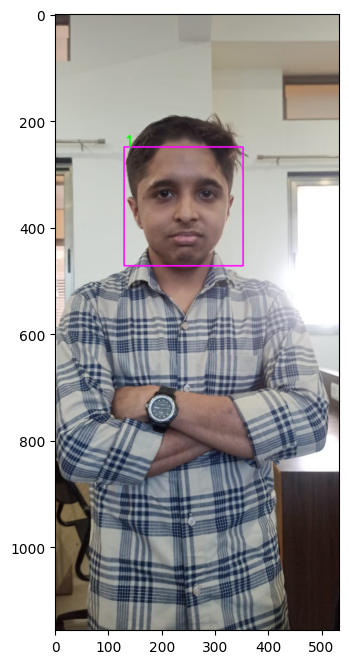

In [ ]:
test_image = cv2.imread(img_path5)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/1_LiveProjects/Copy of haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(400,12,400),2)

  img_gray=gray[y:y+h,x:x+w]

  emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]

  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

  age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
  age_input = age_image.reshape(-1, 200, 200, 1)
  output_age = age_ranges[np.argmax(age_model.predict(age_input))]


  output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  print(output_str)

  col = (0,255,0)

  cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))